<a href="https://colab.research.google.com/github/ludslvaz/API-challend./blob/master/Rastreamento_Idade_Lotes_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Rastreamento da Idade dos Lotes – Notebook Python
Este notebook calcula automaticamente a idade de cada lote com base no histórico de vendas e no lead time de 2 dias.

In [1]:
# Instale o pandas e matplotlib se ainda não tiver instalado
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [3]:
# Carregar o arquivo CSV com os dados de vendas
file_path = 'dados_sevenbits_limpos.csv'
df = pd.read_csv(file_path)
df.head()

,data_dia,id_produto,descricao_produto,total_venda_dia_kg,Equipe responsável
0,25/03/2025,237506,COXA DE FGO INTERF CONG KG,119.06,SevenBits AI
1,26/03/2025,237506,COXA DE FGO INTERF CONG KG,134.33,SevenBits AI
2,27/03/2025,237506,COXA DE FGO INTERF CONG KG,105.21,SevenBits AI
3,28/03/2025,237506,COXA DE FGO INTERF CONG KG,127.56,SevenBits AI
4,29/03/2025,237506,COXA DE FGO INTERF CONG KG,112.05,SevenBits AI


In [4]:
# Converter coluna de data
df['data_dia'] = pd.to_datetime(df['data_dia'], format='%d/%m/%Y')

In [5]:
# Agrupar por data e SKU
df_grouped = df.groupby(['data_dia', 'descricao_produto'])['total_venda_dia_kg'].sum().reset_index()

In [6]:
# Calcular data de retirada e idade do lote
df_grouped['data_retirada'] = df_grouped['data_dia'] - timedelta(days=2)
df_grouped['idade_lote'] = (df_grouped['data_dia'] - df_grouped['data_retirada']).dt.days

In [7]:
# Renomear colunas para visualização
df_grouped = df_grouped.rename(columns={
    'data_dia': 'Data da Venda',
    'descricao_produto': 'SKU',
    'total_venda_dia_kg': 'Kg Vendido',
    'data_retirada': 'Data da Retirada',
    'idade_lote': 'Idade (dias)'
})
df_grouped = df_grouped[['SKU', 'Data da Retirada', 'Data da Venda', 'Kg Vendido', 'Idade (dias)']]
df_grouped.head()

,SKU,Data da Retirada,Data da Venda,Kg Vendido,Idade (dias)
0,COXA DE FGO INTERF CONG KG,2025-03-23,2025-03-25,119.06,2
1,COXA DE FGO INTERF CONG KG,2025-03-24,2025-03-26,134.33,2
2,COXA DE FGO INTERF CONG KG,2025-03-25,2025-03-27,105.21,2
3,COXA DE FGO INTERF CONG KG,2025-03-26,2025-03-28,127.56,2
4,COXA DE FGO INTERF CONG KG,2025-03-27,2025-03-29,112.05,2


In [8]:
# Exportar resultado para CSV
df_grouped.to_csv('lotes_com_idade.csv', index=False)
print('Arquivo lotes_com_idade.csv exportado com sucesso.')

Arquivo lotes_com_idade.csv exportado com sucesso.


In [9]:
# Filtrar produtos disponíveis para venda em 2025-07-02
data_hoje = pd.to_datetime('2025-07-02')
disponiveis_hoje = df_grouped[df_grouped['Data da Venda'] == data_hoje]
disponiveis_hoje

,SKU,Data da Retirada,Data da Venda,Kg Vendido,Idade (dias)


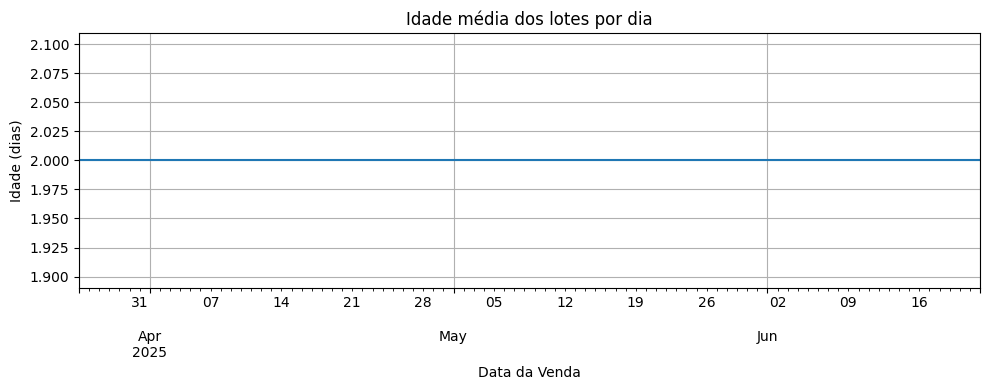

In [10]:
# Gráfico da idade média dos lotes ao longo do tempo
media_idade = df_grouped.groupby('Data da Venda')['Idade (dias)'].mean()
media_idade.plot(kind='line', title='Idade média dos lotes por dia', figsize=(10, 4))
plt.ylabel('Idade (dias)')
plt.xlabel('Data da Venda')
plt.grid(True)
plt.tight_layout()
plt.show()